In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
data = pd.read_csv("./data/data.csv")

data.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


# Original form of data

[]

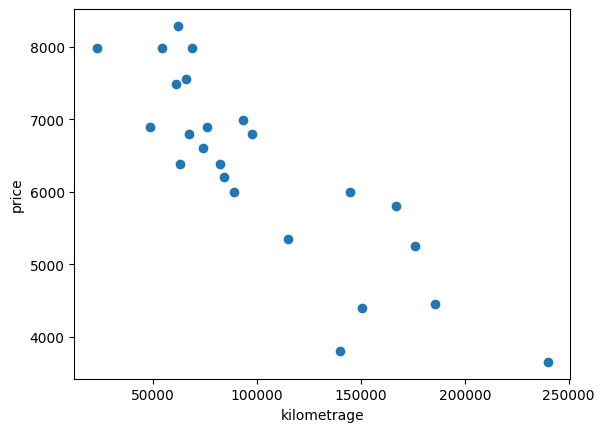

In [107]:
plt.scatter(x=data["km"], y=data["price"])
plt.xlabel("kilometrage")
plt.ylabel("price")
plt.plot()

# Data with normalized values

In [108]:
max_km = data["km"].max()
max_price = data["price"].max()
data["km"] = data["km"] / max_km
data["price"] = data["price"] / max_price

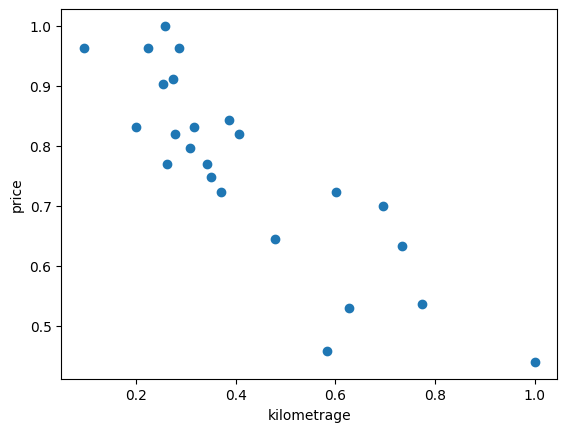

In [109]:
plt.clf()
plt.scatter(x=data["km"], y=data["price"])
plt.xlabel("kilometrage")
plt.ylabel("price")
plt.show()

# Data with predicting linear function

In [110]:
import json

with open("data/values.json") as f:
	file_data = json.load(f)

data["km"] = data["km"] * max_km
data["price"] = data["price"] * max_price

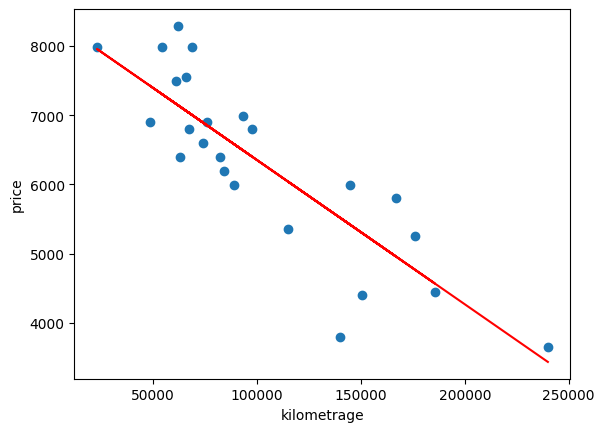

In [111]:
x = data["km"]
y = file_data["theta0"] + file_data["theta1"] * x
plt.plot(x, y, 'r')
plt.scatter(x=data["km"], y=data["price"])
plt.xlabel("kilometrage")
plt.ylabel("price")
plt.show()

# Change in the cost (average error), depending on amount of iterations

In [112]:
from train import predict, error, train
import numpy as np

def cost(features, targets, theta0, theta1):
	predictions = predict(theta0, theta1, features)
	errors = error(predictions, targets)
	return (np.sum(errors ** 2) / (2 * errors.size))

Final average error of the model is 0.003249876763854032


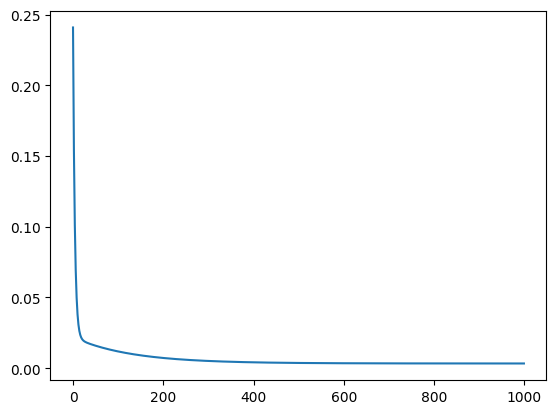

In [113]:
data_norm = data
data_norm["km"] = data["km"] / data["km"].max()
data_norm["price"] = data["price"] / data["price"].max()
data_norm = data_norm.to_numpy()
errors = []
epochs = 1000
theta0 = 0
theta1 = 0
for epoch in range(epochs):
	theta0, theta1 = train(data_norm[:, 0], data_norm[:, 1], theta0, theta1, 0.1)
	errors.append(cost(data_norm[:, 0], data_norm[:, 1], theta0, theta1))
print(f"Final average error of the model is {errors[-1]}")
plt.clf()
plt.plot(np.array(errors))
plt.show()